In [1]:
import pandas as pd
import numpy as np

x = [1.88505201, 0.75858685, 0.53086046, 2.10121118, 2.90456146, 2.82199243, 1.21688824, 2.08582494, 2.80032271, 2.8871096,  1.89067363, 1.05548585]
y = [1.83256566, 0.84474922, 0.9779429,  1.81776092, 0.91189043, 0.90186282, 1.19189881, 1.8977981,  1.09191789, 1.02681764, 2.48316704, 1.01289176]

**PLOT DATA**

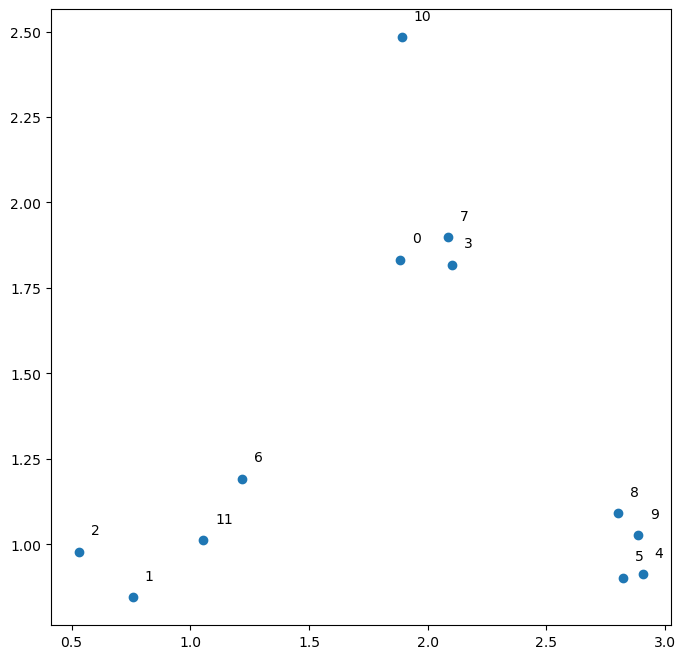

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.scatter(x,y)
numberOfPoints = len(x)
labels = []
for pt in range(numberOfPoints):
    ax.annotate(pt, xy=(x[pt]+0.05, y[pt]+0.05))
    labels.append('Point ' +  str(pt))

**CREATE TUPLES**

In [3]:
zipped = zip(x, y)
print (zipped)

**PLACE DATA INTO A DATA FRAME**

In [4]:
df = pd.DataFrame(zip(x, y), columns=['x', 'y'], index = labels)
df

,x,y
Point 0,1.885052,1.832566
Point 1,0.758587,0.844749
Point 2,0.530860,0.977943
Point 3,2.101211,1.817761
Point 4,2.904561,0.911890
Point 5,2.821992,0.901863
Point 6,1.216888,1.191899
Point 7,2.085825,1.897798
Point 8,2.800323,1.091918
Point 9,2.887110,1.026818


**CREATE DISTANCE MATRIX**

In [5]:
# compute distance matrix
df = pd.DataFrame(zip(x, y), columns=['x', 'y'], index = labels)
distMatrix

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,1.498234,1.601317,0.216666,1.373697,1.320631,0.925687,0.211104,1.177404,1.285826,0.650626,1.166210
1,1.498234,0.000000,0.263818,1.658129,2.147025,2.064196,0.574937,1.694247,2.056642,2.136295,1.991490,0.341205
2,1.601317,0.263818,0.000000,1.780813,2.374620,2.292395,0.718618,1.806668,2.272322,2.356756,2.028495,0.525788
3,0.216666,1.658129,1.780813,0.000000,1.210774,1.165502,1.083388,0.081503,1.007772,1.115001,0.697919,1.319604
4,1.373697,2.147025,2.374620,1.210774,0.000000,0.083176,1.710744,1.281539,0.208028,0.116245,1.869994,1.851832
5,1.320631,2.064196,2.292395,1.165502,0.083176,0.000000,1.631098,1.238479,0.191286,0.140904,1.835178,1.769992
6,0.925687,0.574937,0.718618,1.083388,1.710744,1.631098,0.000000,1.119529,1.586588,1.678360,1.456489,0.241027
7,0.211104,1.694247,1.806668,0.081503,1.281539,1.238479,1.119529,0.000000,1.077010,1.183497,0.617042,1.358182
8,1.177404,2.056642,2.272322,1.007772,0.208028,0.191286,1.586588,1.077010,0.000000,0.108490,1.662238,1.746626
9,1.285826,2.136295,2.356756,1.115001,0.116245,0.140904,1.678360,1.183497,0.108490,0.000000,1.764607,1.831677


**PERFORM HIERARCHICAL CLUSTERING**

In [12]:
from scipy.spatial.distance import pdist, squareform

distMatrix = squareform(pdist(np.column_stack((x, y))))

**PLOT UNCLUSTERED DATA AS A HEATMAP**

In [15]:
def plot_heatmap(order):

  # plot
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111)

  cax = ax.matshow(order, interpolation='nearest', cmap='hot_r')

  ticks=np.arange(-.55, 12, 1)
  plt.yticks(ticks)
  fig.colorbar(cax)

  ax.set_xticks(np.arange(len(order.columns)+1))
  ax.set_xticklabels([''] + list(order.columns), rotation=90)
  ax.set_yticklabels([''] + list(order.index))

  plt.show()

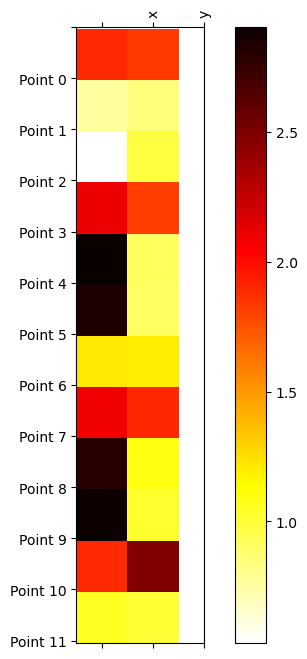

In [16]:
plot_heatmap(df)

In [17]:
R['leaves']

[1, 2, 6, 11, 8, 9, 4, 5, 10, 0, 3, 7]

**PLOT HEATMAP OF DATA WITH RESPECT TO CLUSTERING**

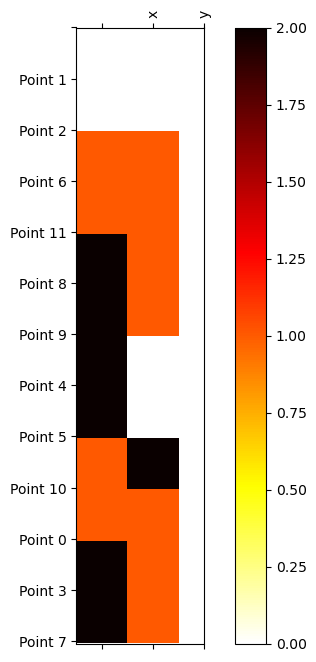

In [18]:
# reorder rows with respect to the clustering
x_ordered = []
y_ordered = []
labels_ordered = []

for index in R['leaves']:
  
  label_ordered = "Point " + str(index)
  point_from_unsorted = df.loc[[label_ordered]]

  xint = int(point_from_unsorted['x'])
  yint = int(point_from_unsorted['y'])

  x_ordered.append(xint)
  y_ordered.append(yint)
  labels_ordered.append(label_ordered)

zipped_ordered = zip(x_ordered, y_ordered)
df_rowclust = pd.DataFrame(zipped_ordered, columns=['x', 'y'], index = labels_ordered)   

# plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

cax = ax.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
ticks=np.arange(-.55,12,1)
plt.yticks(ticks)
fig.colorbar(cax)

# with these lines:
ax.set_xticks(np.arange(len(df_rowclust.columns)+1))
ax.set_xticklabels([''] + list(df_rowclust.columns), rotation=90)
ax.set_yticklabels([''] + list(df_rowclust.index))

plt.show()

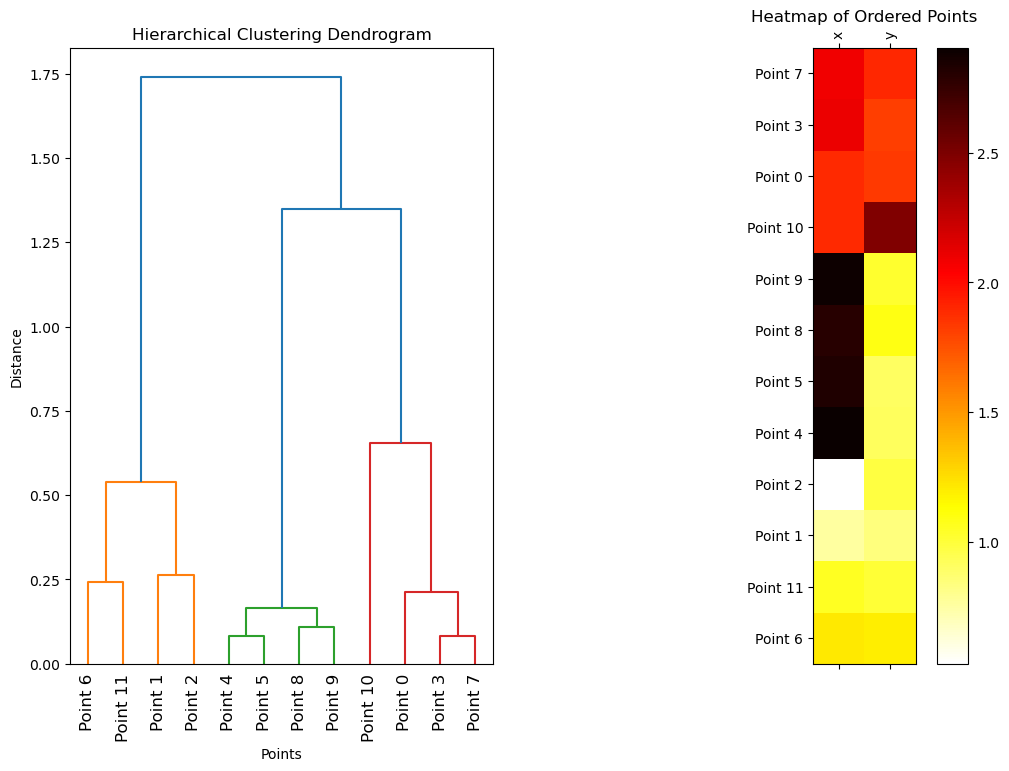

In [24]:
# Calculate distance matrix and linkage matrix
dist_matrix = pdist(df)
link_matrix = linkage(dist_matrix, method='average')

# Order rows according to dendrogram
dendro = dendrogram(link_matrix, no_plot=True)
df_rowclust = df.iloc[dendro['leaves']]

# Plot dendrogram and heatmap
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))

# Dendrogram
ax1.set_title('Hierarchical Clustering Dendrogram')
ax1.set_xlabel('Points')
ax1.set_ylabel('Distance')
dendrogram(link_matrix, labels=df.index, ax=ax1, leaf_rotation=90)

# Heatmap
ax2.set_title('Heatmap of Ordered Points')
cax = ax2.matshow(df_rowclust, interpolation='nearest', cmap='hot_r', origin='lower')
ax2.set_xticks(np.arange(len(df.columns)))
ax2.set_yticks(np.arange(len(df_rowclust.index)))
ax2.set_xticklabels(df.columns, rotation=90)
ax2.set_yticklabels(df_rowclust.index)
fig.colorbar(cax)
plt.show()